<a href="https://colab.research.google.com/github/KPorus/machine-learning-and-python/blob/main/Regression_Predicting_Car_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models based on Confusion Matrix. Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

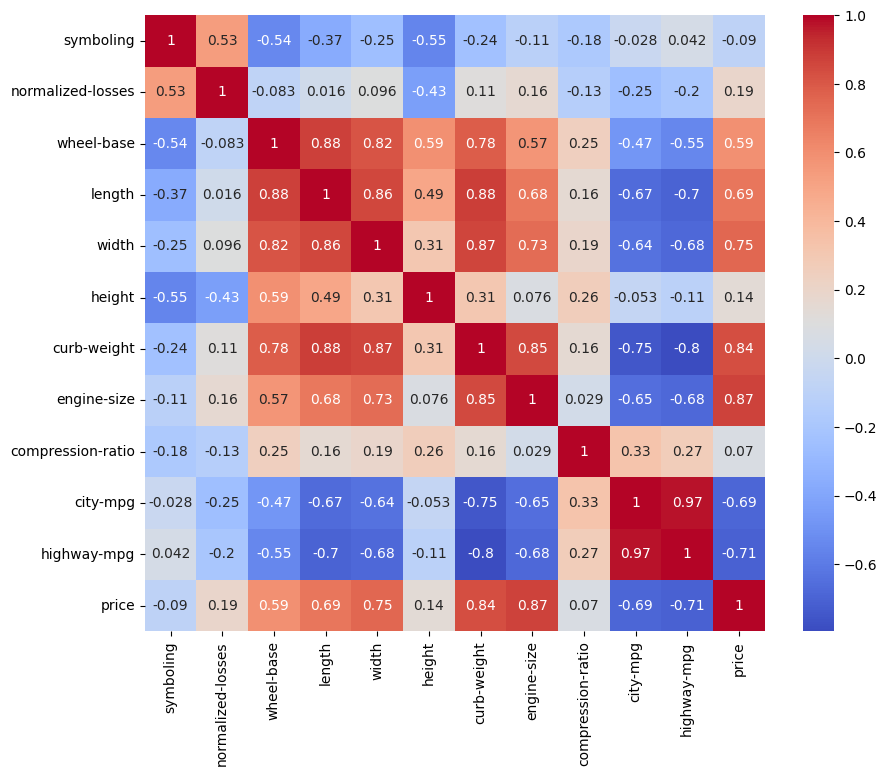

price                1.000000
engine-size          0.871051
curb-weight          0.835277
width                0.753236
length               0.692774
wheel-base           0.588382
normalized-losses    0.191829
height               0.139003
compression-ratio    0.069881
symboling           -0.090242
city-mpg            -0.688254
highway-mpg         -0.705924
Name: price, dtype: float64


In [3]:
df['symboling'] = pd.to_numeric(df['symboling'], errors='coerce')
numeric_df = df.select_dtypes(exclude=['object'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_price)

In [35]:
x = df.drop(['price','height','symboling','normalized-losses','compression-ratio','aspiration','num-of-doors','engine-location'], axis=1)
y = df['price']

In [ ]:
x.head()

In [5]:
x.isnull().sum()

,0
make,0
fuel-type,0
body-style,0
drive-wheels,0
wheel-base,0
length,0
width,0
curb-weight,0
engine-type,0
num-of-cylinders,0


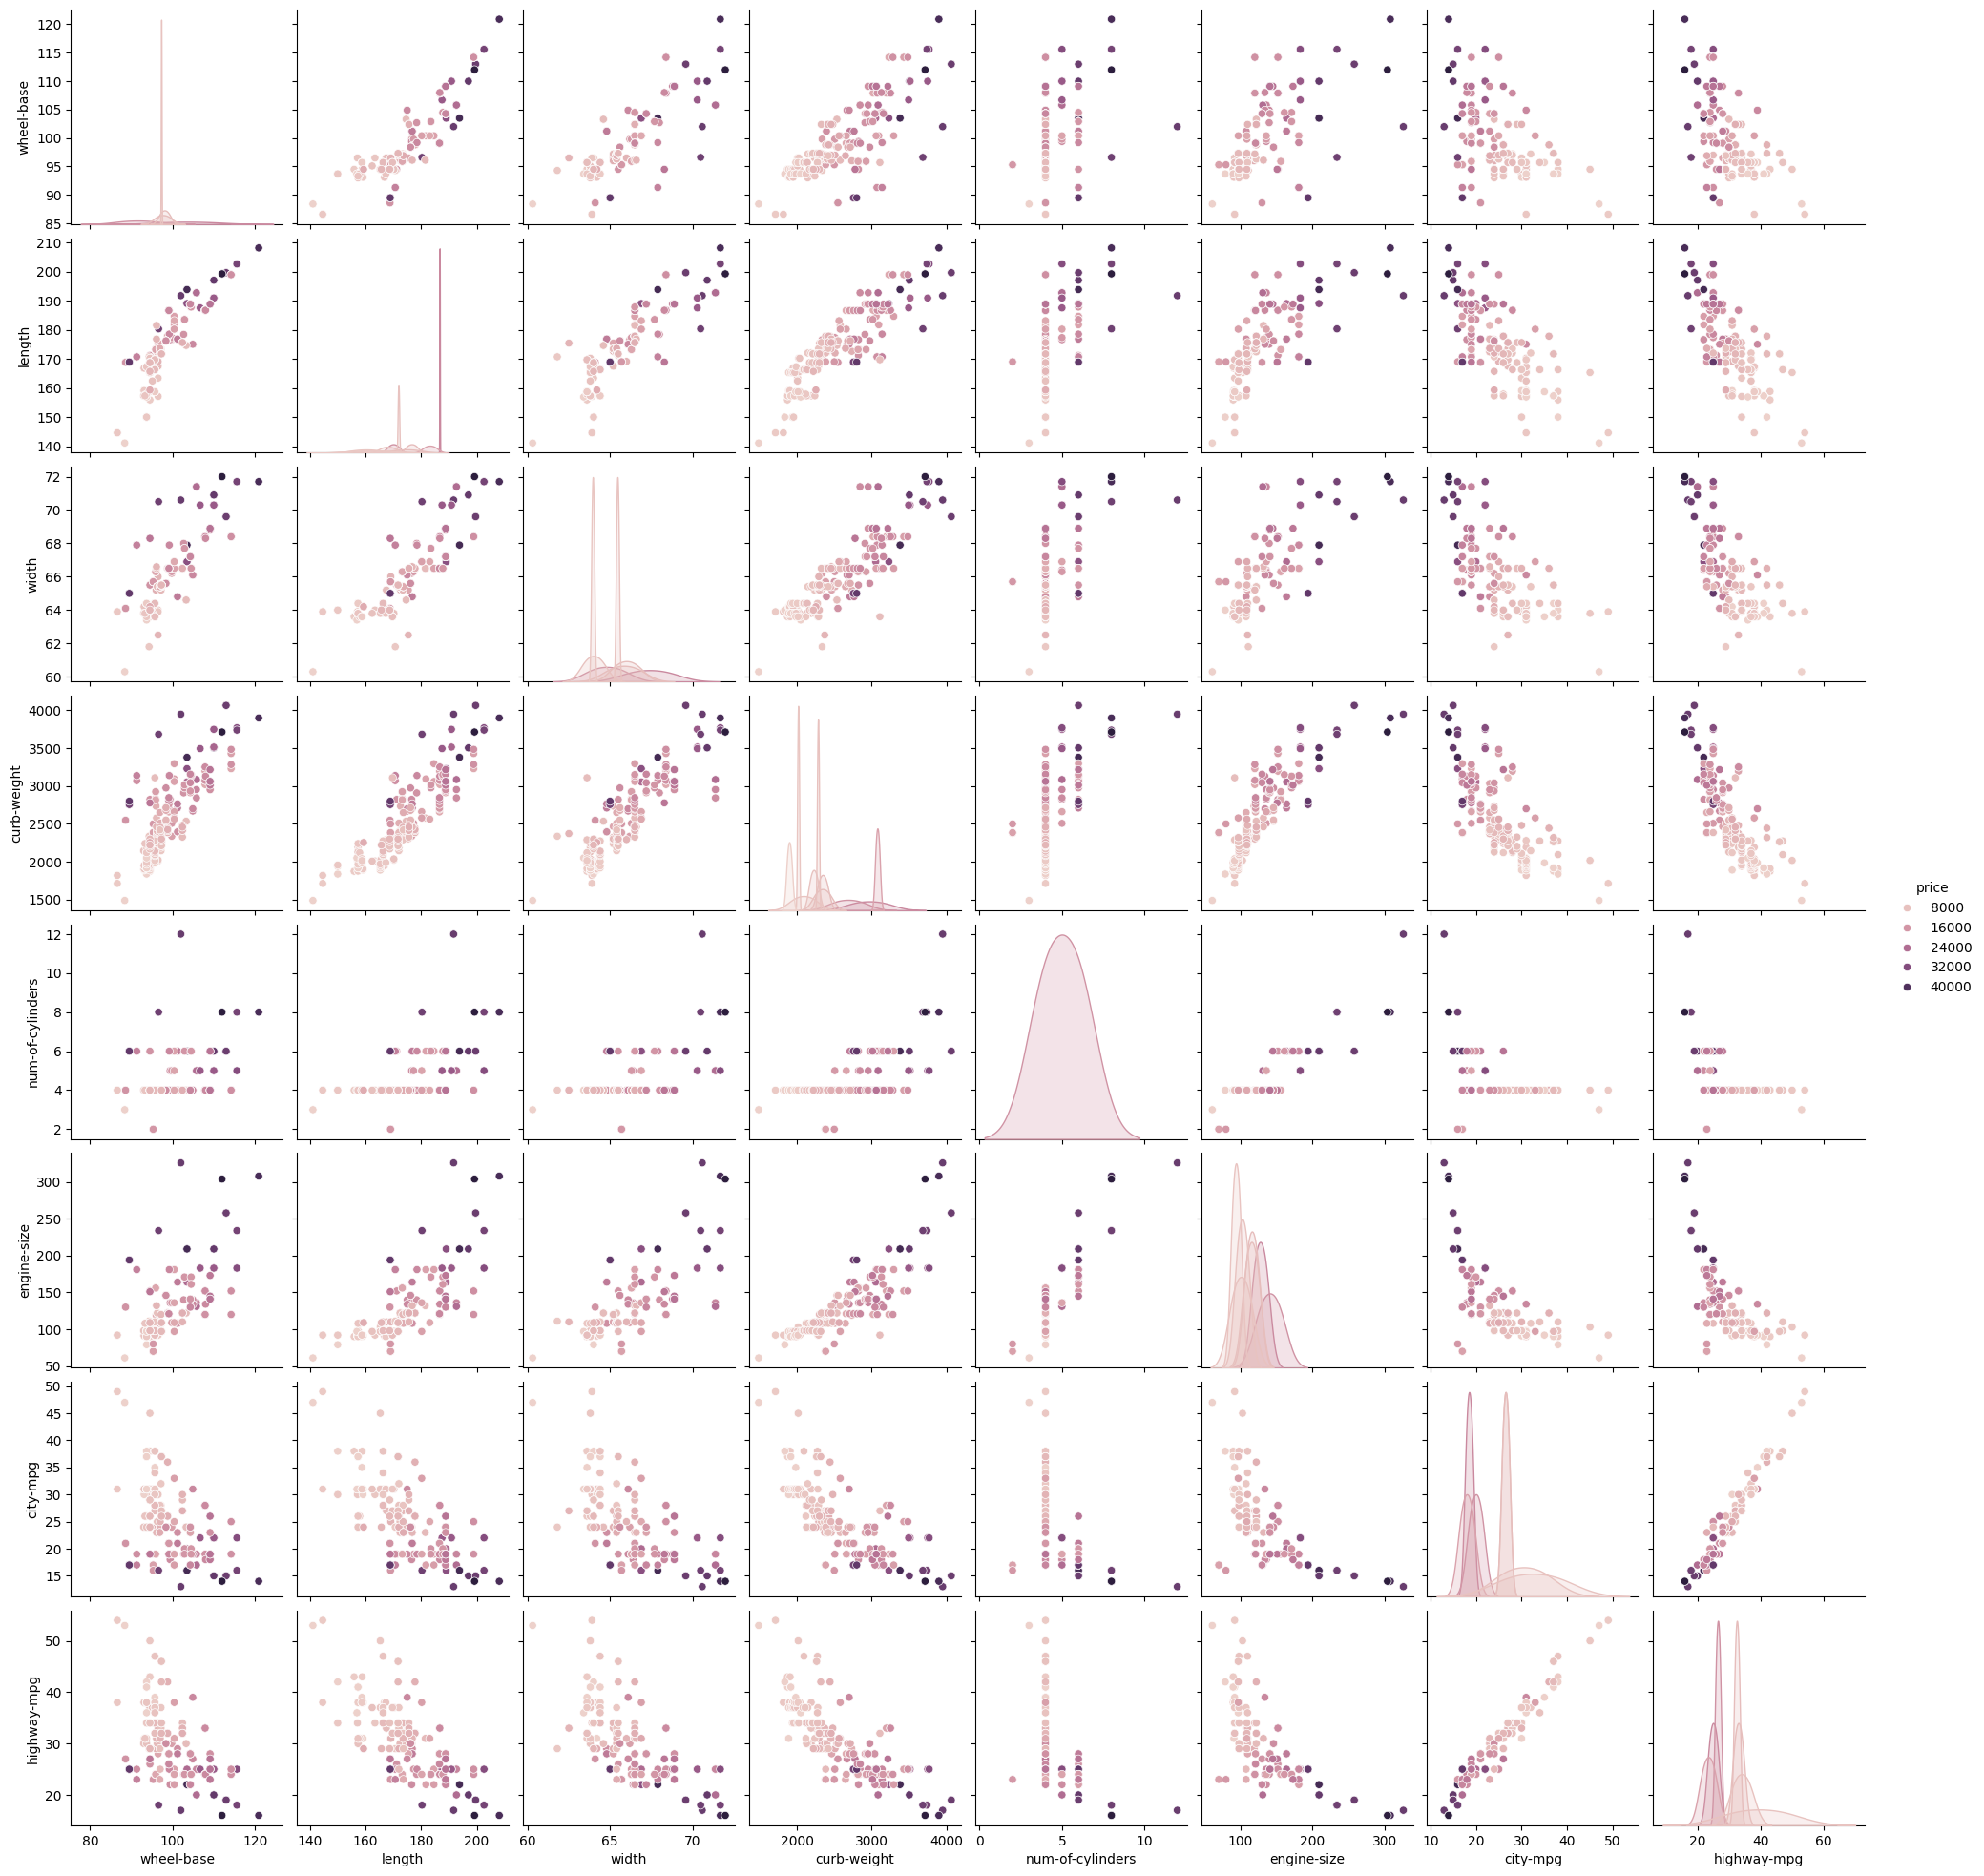

In [48]:
x['price'] = y
sns.pairplot(x, hue='price')
plt.show()

In [ ]:
x.drop('price', axis=1, inplace=True)
x.head()

#Outlier finding & treatment

In [ ]:
numerical_columns = ['curb-weight','city-mpg', 'highway-mpg']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(x=x[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [ ]:
numerical_columns = ['wheel-base', 'length', 'width', 'engine-size','city-mpg', 'highway-mpg']
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [36]:
numerical_columns = ['curb-weight','city-mpg', 'highway-mpg']
for i in numerical_columns:
    print(f'Column: {i}')
    upper_limit = x[i].mean() + 3*x[i].std()
    lower_limit = x[i].mean() - 3*x[i].std()

    x[i] = np.where(x[i] > upper_limit, upper_limit, np.where(x[i] < lower_limit, lower_limit, x[i]))

Column: curb-weight
Column: city-mpg
Column: highway-mpg


In [37]:
numerical_columns = ['wheel-base','length', 'width', 'engine-size','city-mpg', 'highway-mpg']
for i in numerical_columns:
    print(f'Column: {i}')
    x[i].describe()
    upper_limit = x[i].quantile(0.75) + 1.5*( x[i].quantile(0.75) - x[i].quantile(0.25))
    lower_limit = x[i].quantile(0.75) - 1.5*( x[i].quantile(0.75) - x[i].quantile(0.25))

    x[i] = np.where(x[i] > upper_limit, upper_limit, np.where(x[i] < lower_limit, lower_limit, x[i]))

Column: wheel-base
Column: length
Column: width
Column: engine-size
Column: city-mpg
Column: highway-mpg


#Encoding

In [42]:
count = x['make'].value_counts()
car_repl = count[count <= 10].index
car_repl

Index(['dodge', 'mercedes-benz', 'bmw', 'plymouth', 'audi', 'saab', 'porsche',
       'jaguar', 'chevrolet', 'alfa-romero', 'isuzu', 'renault', 'mercury'],
      dtype='object', name='make')

In [43]:
fuel_s = x['fuel-system'].value_counts()[x['fuel-system'].value_counts() <= 20].index
fuel_s

Index(['idi', '1bbl', 'spdi', '4bbl', 'mfi', 'spfi'], dtype='object', name='fuel-system')

In [44]:
bds = x['body-style'].value_counts()[x['body-style'].value_counts() <= 20].index
bds

Index(['hardtop', 'convertible'], dtype='object', name='body-style')

In [45]:
ent = x['engine-type'].value_counts()[x['engine-type'].value_counts() < 100].index
ent

Index(['ohcf', 'ohcv', 'dohc', 'l', 'rotor'], dtype='object', name='engine-type')

In [ ]:
x['make'].replace(car_repl, 'uncommon', inplace=True)
x['fuel-system'].replace(fuel_s, 'uncommon', inplace=True)
x['body-style'].replace(bds, 'uncommon', inplace=True)
x['engine-type'].replace(ent, 'uncommon', inplace=True)

In [47]:
x['num-of-cylinders'] = x['num-of-cylinders'].replace(['four', 'six', 'five', 'eight', 'two', 'three', 'twelve', 'sixteen', 'two'], [4, 6, 5, 8, 2, 3, 12, 16, 2])
x.head()

<ipython-input-47-330009471fc1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['num-of-cylinders'] = x['num-of-cylinders'].replace(['four', 'six', 'five', 'eight', 'two', 'three', 'twelve', 'sixteen', 'two'], [4, 6, 5, 8, 2, 3, 12, 16, 2])


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,uncommon,gas,uncommon,rwd,90.55,168.8,64.1,2548.0,uncommon,4,130.0,mpfi,3.47,2.68,111,5000,21.0,27.0
1,uncommon,gas,uncommon,rwd,90.55,168.8,64.1,2548.0,uncommon,4,130.0,mpfi,3.47,2.68,111,5000,21.0,27.0
2,uncommon,gas,hatchback,rwd,94.50,171.2,65.5,2823.0,uncommon,6,152.0,mpfi,2.68,3.47,154,5000,19.0,26.0
3,uncommon,gas,sedan,fwd,99.80,176.6,66.2,2337.0,ohc,4,109.0,mpfi,3.19,3.4,102,5500,24.0,30.0
4,uncommon,gas,sedan,4wd,99.40,176.6,66.4,2824.0,ohc,5,136.0,mpfi,3.19,3.4,115,5500,18.0,22.0


#Data spliting

In [52]:
# Replace '?' with NaN
x = x.replace('?', pd.NA)

# Convert columns to numeric, coercing errors to NaN
for col in ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']:
    x[col] = pd.to_numeric(x[col], errors='coerce')

x.head()


,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg
0,uncommon,gas,uncommon,rwd,90.55,168.8,64.1,2548.0,uncommon,4,130.0,mpfi,3.47,2.68,111.0,5000.0,21.0,27.0
1,uncommon,gas,uncommon,rwd,90.55,168.8,64.1,2548.0,uncommon,4,130.0,mpfi,3.47,2.68,111.0,5000.0,21.0,27.0
2,uncommon,gas,hatchback,rwd,94.50,171.2,65.5,2823.0,uncommon,6,152.0,mpfi,2.68,3.47,154.0,5000.0,19.0,26.0
3,uncommon,gas,sedan,fwd,99.80,176.6,66.2,2337.0,ohc,4,109.0,mpfi,3.19,3.40,102.0,5500.0,24.0,30.0
4,uncommon,gas,sedan,4wd,99.40,176.6,66.4,2824.0,ohc,5,136.0,mpfi,3.19,3.40,115.0,5500.0,18.0,22.0


In [53]:
x['bore'] = x['bore'].fillna(x['bore'].mean())
x['stroke'] = x['stroke'].fillna(x['stroke'].mean())
x['horsepower'] = x['horsepower'].fillna(x['horsepower'].mean())
x['peak-rpm'] = x['peak-rpm'].fillna(x['peak-rpm'].mean())

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaling

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the columns to be scaled (numerical) and encoded (categorical)
numerical_columns = ['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
categorical_columns =['make', 'fuel-system', 'body-style', 'engine-type','fuel-type','drive-wheels']

col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale the numerical columns
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # OneHotEncode the categorical columns
    ]
)

x_train_transformed = col_transformer.fit_transform(x_train)
x_test_transformed = col_transformer.transform(x_test)
print(x_train_transformed)


[[ 1.82729498  1.2701677   1.62301162 ...  0.          0.
   1.        ]
 [-0.40904818  0.07810254 -0.32820538 ...  1.          1.
   0.        ]
 [-0.90601332 -1.42977094 -1.0665037  ...  1.          1.
   0.        ]
 ...
 [-0.76402328 -0.79370632 -1.0665037  ...  1.          1.
   0.        ]
 [-0.26705813 -0.25104979 -0.16999859 ...  1.          1.
   0.        ]
 [-1.33198345 -0.34000987  1.09565568 ...  1.          0.
   1.        ]]


# Linear

In [56]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [57]:
l1 = LinearRegression()
l1.fit(x_train_transformed , y_train)
print(f'Train: {l1.score(x_train_transformed , y_train)}')
print(f'Test: {l1.score(x_test_transformed , y_test)}')

Train: 0.8896906094141516
Test: 0.8724364125617393


#Decision tree regression

In [58]:
col_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # OneHotEncode the categorical columns
    ],
    remainder='passthrough'
)

x_train_n = col_transformer.fit_transform(x_train)
x_test_n = col_transformer.transform(x_test)

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

tree_regressor = DecisionTreeRegressor()
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']  # Criteria for regression
}

# Perform GridSearchCV for Decision Tree Regressor
grid_tree = GridSearchCV(tree_regressor, param_grid_tree, cv=25, scoring='neg_mean_squared_error')
grid_tree.fit(x_train_n, y_train)

# Print the best parameters and score
print("Best parameters for Decision Tree Regressor:", grid_tree.best_params_)
print("Best score for Decision Tree Regressor (Negative MSE):", grid_tree.best_score_)

y_pred = grid_tree.predict(x_test_n)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on test data: {mse}")
print(f"R-squared on test data: {r2}")


Best parameters for Decision Tree Regressor: {'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score for Decision Tree Regressor (Negative MSE): -6512724.58547619
Mean Squared Error on test data: 13750470.451219512
R-squared on test data: 0.8803510441874366


In [179]:
from sklearn.tree import DecisionTreeRegressor
# dtr = DecisionTreeRegressor(max_depth=7, criterion='squared_error', min_samples_leaf=1, min_samples_split=5)
# dtr = DecisionTreeRegressor(criterion='absolute_error',max_depth=5,min_samples_leaf=4, min_samples_split=5)
# dtr = DecisionTreeRegressor(criterion='absolute_error',max_depth=8,min_samples_leaf=4, min_samples_split=5)
# dtr = DecisionTreeRegressor(max_depth=25, criterion='friedman_mse',max_leaf_nodes=25,min_samples_leaf=4, min_samples_split=4)
dtr = DecisionTreeRegressor(max_depth=20, criterion='friedman_mse',max_leaf_nodes=20,min_samples_leaf=7, min_samples_split=7)
dtr.fit(x_train_n, y_train)
print(f'Train: {dtr.score(x_train_n, y_train)}')
print(f'Test: {dtr.score(x_test_n, y_test)}')

Train: 0.9194189508365694
Test: 0.9472322526111259


In [86]:
# dtr1 = DecisionTreeRegressor(max_depth=20, criterion='friedman_mse',max_leaf_nodes=20)
# dtr1.fit(x_train_n, y_train)
# dtr1.score(x_train_n, y_train)

0.9707594913382194

In [87]:
# dtr1.score(x_test_n,y_test)

0.9431443017401611

#Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=15, criterion='poisson',max_leaf_nodes=15, random_state=42)
model.fit(x_train_n, y_train)
print(f'Train: {model.score(x_train_n, y_train)}')
print(f'Test: {model.score(x_test_n, y_test)}')

Train: 0.9657996926546367
Test: 0.9476241199358694


#Model Evalution

In [180]:
from sklearn.metrics import r2_score, mean_squared_error
l_pred = l1.predict(x_test_transformed)
l_r2 = r2_score(y_test, l_pred)
l_mse = mean_squared_error(y_test, l_pred)
l_rmse = mean_squared_error(y_test, l_pred, squared=False)

dtr_pred = dtr.predict(x_test_n)
dtr_r2 = r2_score(y_test, dtr_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_rmse = mean_squared_error(y_test, dtr_pred, squared=False)

model_pred = model.predict(x_test_n)
model_r2 = r2_score(y_test, model_pred)
model_mse = mean_squared_error(y_test, model_pred)
model_rmse = mean_squared_error(y_test, model_pred, squared =False)

print(f"Decision tree regression R-squared:{dtr_r2}")
print(f"Decision tree regression Mean Squared Error:{dtr_mse}")
print(f"Decision tree regression Root Mean Squared Error:{dtr_rmse}\n\n")

print(f"Linear Regression R-squared:{l_r2}")
print(f"Linear Regression Mean Squared Error:{l_mse}")
print(f"Linear Regression Root Mean Squared Error:{l_rmse}\n\n")

print("Random Forest Regression R-squared:", model_r2)
print("Random Forest Regression Mean Squared Error:", model_mse)
print(f"Random Forest Regression Root Mean Squared Error:{model_rmse}\n\n")

Decision tree regression R-squared:0.9472322526111259
Decision tree regression Mean Squared Error:6064251.428861541
Decision tree regression Root Mean Squared Error:2462.570086081113


Linear Regression R-squared:0.8724364125617393
Linear Regression Mean Squared Error:14660047.200655796
Linear Regression Root Mean Squared Error:3828.8441076460394


Random Forest Regression R-squared: 0.9476241199358694
Random Forest Regression Mean Squared Error: 6019216.685072181
Random Forest Regression Root Mean Squared Error:2453.4091964187674




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Comparison: Linear Regression vs. Decision Tree Regression vs. Random Forest Regression**

#### **Linear Regression:**
- **R²:** 0.8724 (Performs reasonably well, explaining ~87% of the variance)
- **MSE:** 14,660,047.20 (Higher error, indicating less precision)
- **RMSE:** 3,828.84 (Larger error margin, less accurate predictions)

#### **Decision Tree Regression:**
- **R²:** 0.9472 (Very strong performance, explaining ~95% of the variance)
- **MSE:** 6,064,251.43 (Lower error, better precision)
- **RMSE:** 2,462.57 (More accurate predictions, smaller error margin)

#### **Random Forest Regression:**
- **R²:** 0.9476 (Slightly better than Decision Tree, explaining ~95% of the variance)
- **MSE:** 6,019,216.69 (Lowest error, offering the best precision)
- **RMSE:** 2,453.41 (Smallest error margin, making Random Forest the most accurate)

---

### **Key Observations:**
- **Random Forest Regression** slightly outperforms **Decision Tree** in terms of R², MSE, and RMSE, making it the most accurate model.
- **Decision Tree Regression** performs almost as well as Random Forest, but with a marginally higher error.
- **Linear Regression** underperforms compared to both tree-based models, with significantly higher error (MSE and RMSE) and a lower R², indicating that it is less suitable for this task.

---

### **Conclusion:**
While both **Decision Tree** and **Random Forest** offer very strong and comparable performances, **Random Forest** edges out with slightly lower error and higher accuracy. **Linear Regression**, while somewhat effective, does not perform as well and is not the ideal model for this dataset due to its relatively lower accuracy and higher error.